In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Exponential smoothing function
def exponential_smoothing(series, alpha):
    result = np.zeros_like(series)
    result[0] = series[0]
    for t in range(1, len(series)):
        result[t] = alpha * series[t] + (1 - alpha) * result[t - 1]
    return result

# Assuming positions_history is a numpy array with shape (iterations, agents, 2)
positions_history = np.load('positions_history.npy')

# Set the smoothing factor (alpha)
alpha = 2  # Change this value based on how much smoothing you want

# Number of iterations and agents
num_iterations, num_agents, _ = positions_history.shape

# Initialize an array to store smoothed positions
smoothed_positions_history = np.zeros_like(positions_history)

# Apply smoothing to each agent's path
for agent in range(num_agents):
    for dimension in range(2):  # 0 for x, 1 for y
        smoothed_positions_history[:, agent, dimension] = exponential_smoothing(positions_history[:, agent, dimension], alpha)

In [70]:
# Reshape the array
reshaped_array = smoothed_positions_history.reshape(-1, 2)  # This will have a shape of (5000, 2)

# Create a DataFrame from the reshaped array
df = pd.DataFrame(reshaped_array, columns=['x', 'y'])

# Add iteration and agent ID columns
df['iteration'] = np.repeat(np.arange(num_iterations), num_agents)
df['agent_id'] = np.tile(np.arange(num_agents), num_iterations)

# Now df is a DataFrame with columns: 'x', 'y', 'iteration', 'agent_id'

In [71]:
df.head(10)

,x,y,iteration,agent_id
0,101.010000,23.800000,0,0
1,97.840000,20.410000,0,1
2,90.890000,41.730000,0,2
3,96.440000,39.940000,0,3
4,84.520000,29.520000,0,4
5,84.010170,6.800170,1,0
6,94.032974,16.760115,1,1
7,107.889830,24.730170,1,2
8,97.441106,37.662870,1,3
9,101.519830,42.369329,1,4


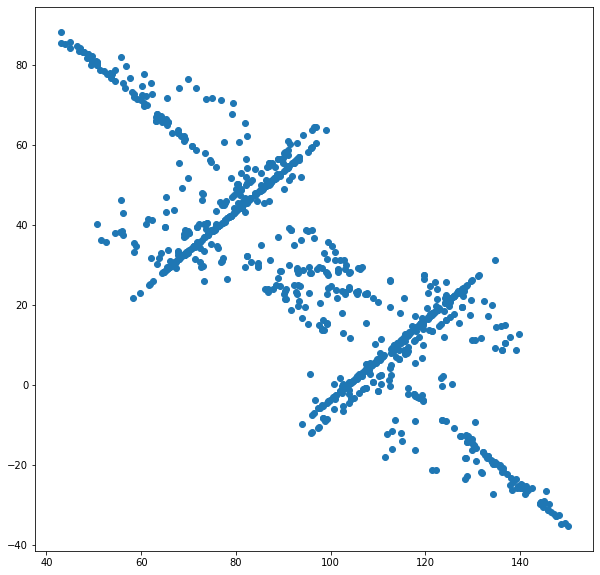

In [73]:
# plot only for agent_id = 0
plt.figure(figsize=(10, 10))
plt.scatter(df[df['agent_id'] == 1]['x'], df[df['agent_id'] == 1]['y'])